# Recopilacion de los datos

Se hara un analisis predictivo de la supervivencia de los pasajeros del Titanic. Para esto se utilizaran distintos modelos, ademas de evaluar el rendimiento del modelo Logistic Regression en este caso particular.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("train.csv")

print("Total datos: ", len(df))

df.head()

Total datos:  891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Procesamiento del data set

En este paso verificamos los null values y los datos que no aportan al analisis. 

In [4]:
df.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
print("Promedio edad hombres: ", df[df.isnull()['Age'] == False][df['Sex']=='male']['Age'].mean())
print("Mediana edad hombres: ", df[df.isnull()['Age'] == False][df['Sex']=='male']['Age'].median())

df['Age'] = df['Age'].replace(df[df.isnull()['Age'] == True][df['Sex']=='male']['Age'],df[df.isnull()['Age'] == False][df['Sex']=='male']['Age'].median())

print("Datos nulos columna Age",df.isnull()['Age'].sum())

/home/spawnqq/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/spawnqq/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/spawnqq/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Promedio edad hombres:  30.72664459161148
Mediana edad hombres:  29.0
Datos nulos columna Age 53


In [7]:
print("Promedio edad mujeres: ", df[df.isnull()['Age'] == False][df['Sex']=='female']['Age'].mean())
print("Mediana edad mujeres: ", df[df.isnull()['Age'] == False][df['Sex']=='female']['Age'].median())

df['Age'] = df['Age'].replace(df[df.isnull()['Age'] == True][df['Sex']=='female']['Age'],df[df.isnull()['Age'] == False][df['Sex']=='female']['Age'].median())

print("Datos nulos columna Age",df.isnull()['Age'].sum())

Promedio edad mujeres:  27.915708812260537
Mediana edad mujeres:  27.0
Datos nulos columna Age 0


/home/spawnqq/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/spawnqq/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/spawnqq/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [8]:
df.drop(['Cabin'],1, inplace=True)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [9]:
df = df.dropna(subset=['Embarked'])
print(len(df))

889


In [59]:
df2 = pd.DataFrame(data=df)

df2 = df2.drop(['Ticket'],1)
df2 = df2.drop(['Name'],1)
df2 = df2.drop(['PassengerId'],1)


df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,1


In [18]:
df2['Embarked'] = df2['Embarked'].replace(['S'],1)
df2['Embarked'] = df2['Embarked'].replace(['C'],2)
df2['Embarked'] = df2['Embarked'].replace(['Q'],3)

#df['Embarked'] = df['Embarked'].replace([1],'S')
#df['Embarked'] = df['Embarked'].replace([2],'C')
#df['Embarked'] = df['Embarked'].replace([3],'Q')

df2['Embarked'].unique()

array([1, 2, 3])

In [21]:
df2['Sex'] = df2['Sex'].replace(['male'],0)
df2['Sex'] = df2['Sex'].replace(['female'],1)

df2['Sex'].unique()

array([0, 1])

In [25]:
df2.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
dtype: object

In [57]:
df2.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,0.350956,29.395017,0.524184,0.382452,32.096681,1.362205
std,256.998173,0.486260,0.834700,0.477538,12.984264,1.103705,0.806761,49.697504,0.636157
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,224.000000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000
50%,446.000000,0.000000,3.000000,0.000000,29.000000,0.000000,0.000000,14.454200,1.000000
75%,668.000000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


# Exploracion y analisis de los datos

En esta fase, ya es posible explorar los datos, ver la correlacion entre los mismos y graficar para poder encontrar alguna tendencia. Para esto utilizamos la libreria seaborn y matplotlib. 

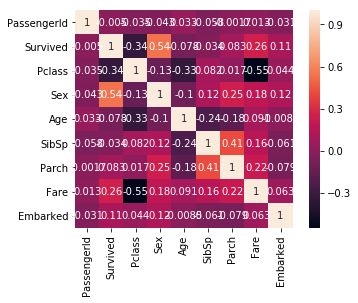

In [29]:
import seaborn as sns

sns.heatmap(df2.corr(), square = True, annot = True)

No sobrevivieron:  549 , corresponde un  61.75 %
Sobrevivieron:  340 , corresponde un  38.25 %


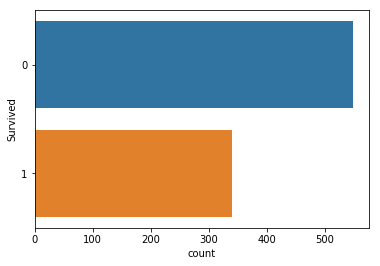

In [37]:
sns.countplot(y='Survived',data=df2)

print ("No sobrevivieron: ",df2[df['Survived']==0]['Survived'].count(),", corresponde un ", round(df2[df['Survived']==0]['Survived'].count()/df2['Survived'].count()*100,2),"%")
print ("Sobrevivieron: ", df2[df['Survived']==1]['Survived'].count(),", corresponde un ",round(df2[df['Survived']==1]['Survived'].count()/df2['Survived'].count()*100,2),"%")

/home/spawnqq/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


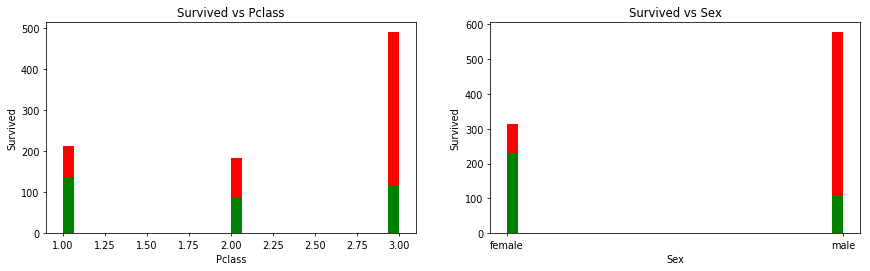

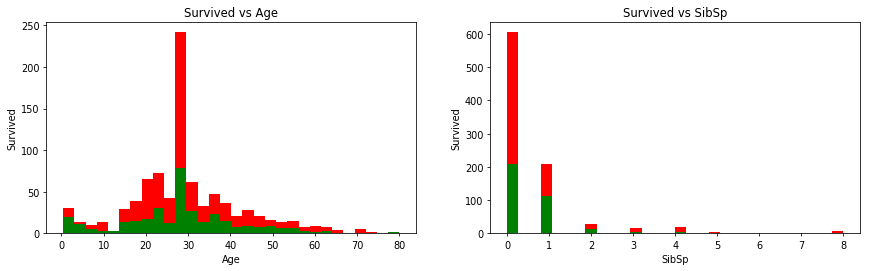

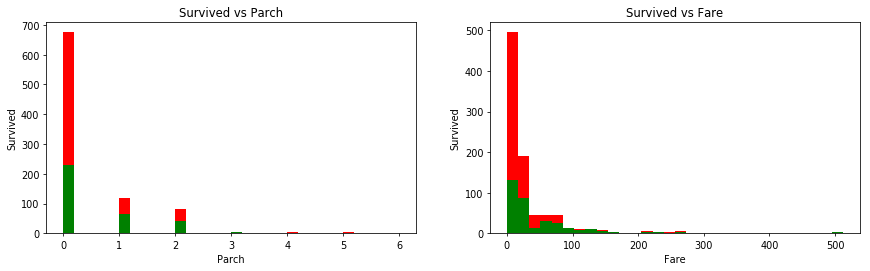

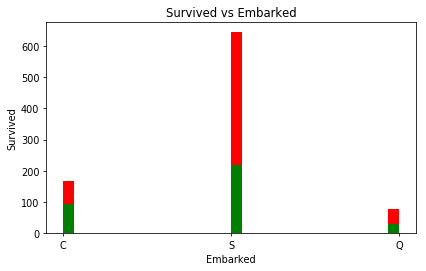

In [44]:
#Primer par de graficos

plt.figure(figsize=(15, 4), dpi=70)
plt.subplot(1,2,1)
plt.title("Survived vs Pclass")
plt.xlabel("Pclass")
plt.ylabel("Survived")

plt.hist([df[df['Survived']==1]['Pclass'],df[df['Survived']==0]['Pclass']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Not survive','Survived'])

plt.subplot(1,2,2)
plt.title("Survived vs Sex")
plt.xlabel("Sex")
plt.ylabel("Survived")

plt.hist([df[df['Survived']==1]['Sex'],df[df['Survived']==0]['Sex']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Not survive','Survived'])
plt.show()

#Segundo par de graficos

plt.figure(figsize=(15, 4), dpi=70)
plt.subplot(1,2,1)
plt.title("Survived vs Age")
plt.xlabel("Age")
plt.ylabel("Survived")

plt.hist([df[df['Survived']==1]['Age'],df[df['Survived']==0]['Age']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Not survive','Survived'])

plt.subplot(1,2,2)
plt.title("Survived vs SibSp")
plt.xlabel("SibSp")
plt.ylabel("Survived")

plt.hist([df[df['Survived']==1]['SibSp'],df[df['Survived']==0]['SibSp']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Not survive','Survived'])
plt.show()

#Tercer par de graficos

plt.figure(figsize=(15, 4), dpi=70)
plt.subplot(1,2,1)
plt.title("Survived vs Parch")
plt.xlabel("Parch")
plt.ylabel("Survived")

plt.hist([df[df['Survived']==1]['Parch'],df[df['Survived']==0]['Parch']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Not survive','Survived'])

plt.subplot(1,2,2)
plt.title("Survived vs Fare")
plt.xlabel("Fare")
plt.ylabel("Survived")

plt.hist([df[df['Survived']==1]['Fare'],df[df['Survived']==0]['Fare']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Not survive','Survived'])
plt.show()

#Cuarto par de graficos

plt.figure(figsize=(15, 4), dpi=70)
plt.subplot(1,2,1)
plt.title("Survived vs Embarked")
plt.xlabel("Embarked")
plt.ylabel("Survived")

plt.hist([df[df['Survived']==1]['Embarked'],df[df['Survived']==0]['Embarked']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Not survive','Survived'])

plt.show()

Text(0,0.5,'SibSp')

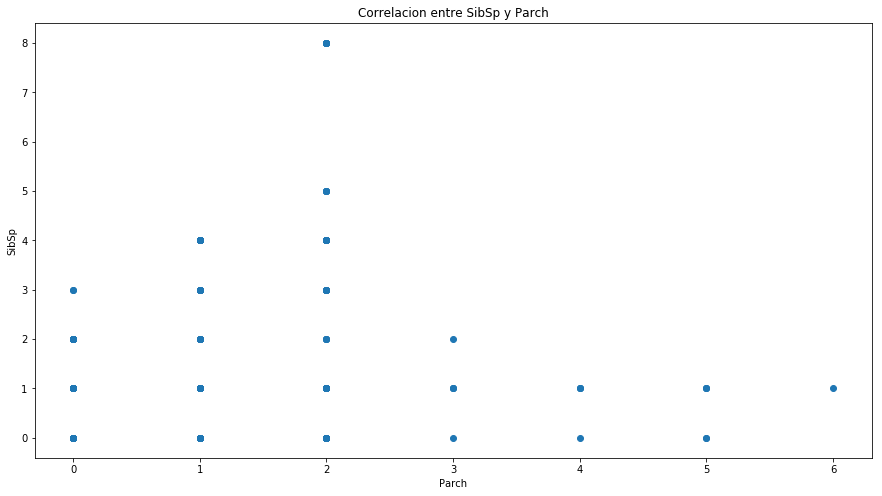

In [52]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1) 
ax.scatter(df2['Parch'],df2['SibSp'])
plt.title('Correlacion entre SibSp y Parch')
plt.xlabel('Parch')
plt.ylabel('SibSp')

Text(0,0.5,'Parch')

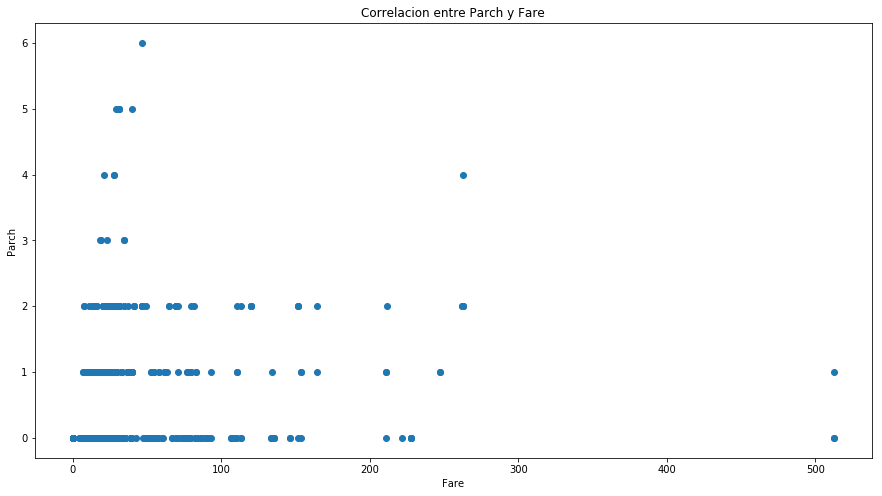

In [53]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1) 
ax.scatter(df2['Fare'],df2['Parch'])
plt.title('Correlacion entre Parch y Fare')
plt.xlabel('Fare')
plt.ylabel('Parch')

Text(0,0.5,'Survived')

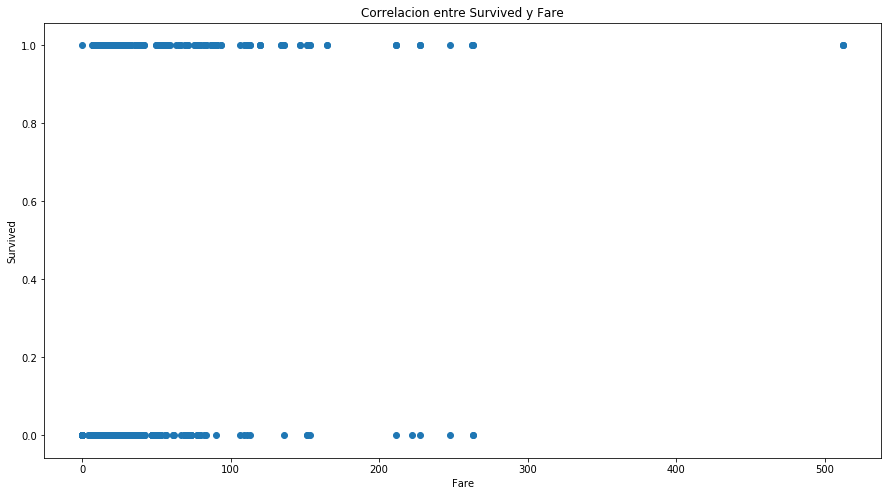

In [54]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1) 
ax.scatter(df2['Fare'],df2['Survived'])
plt.title('Correlacion entre Survived y Fare')
plt.xlabel('Fare')
plt.ylabel('Survived')

# Modelos predictivos

Creamos arreglos numpy, escalamos la variable X, por ultimo creamos las variables train y test

In [61]:
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

y = pd.DataFrame(data=df2['Survived'])

X = pd.DataFrame(data=df2.ix[:,1:8])

X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,2
2,3,1,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,3,0,35.0,0,0,8.0500,1


In [62]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [64]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2)

print (X_train.shape, y_train.shape) 
print (X_test.shape, y_test.shape)

(711, 7) (711, 1)
(178, 7) (178, 1)


In [92]:
y_test.head()

,Survived
380,1
87,0
526,1
774,1
443,1


In [66]:
lm = LogisticRegression()
model = lm.fit(X_train, y_train)
predictions = model.predict(X_test)

predictions

/home/spawnqq/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1])

In [69]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predictions)

confusion_matrix

array([[96, 11],
       [23, 48]])

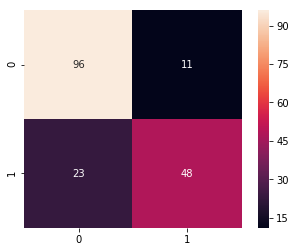

In [71]:
sns.heatmap(confusion_matrix, square = True, annot = True)

In [72]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.81      0.90      0.85       107
          1       0.81      0.68      0.74        71

avg / total       0.81      0.81      0.81       178



In [73]:
print ("Score:", model.score(X_test, y_test))

Score: 0.8089887640449438


In [85]:
from sklearn.tree import DecisionTreeClassifier

clf =  DecisionTreeClassifier ()
clf.fit(X_train, y_train)
C = clf.feature_importances_
for i in range(len((C))):
    print(X.columns[i], ': ', round(C[i]*100,2))

Pclass :  8.63
Sex :  30.78
Age :  28.0
SibSp :  2.47
Parch :  1.34
Fare :  26.74
Embarked :  2.04


In [102]:
prom_sur = 0
pred_sur = 0
for i in range(len(predictions)):
    if predictions[i] == 1:
        pred_sur = pred_sur + 1
    if y_test['Survived'].iloc[i] == 1:
        prom_sur = prom_sur + 1
        
prom_sur = (prom_sur / len(predictions) )* 100
pred_sur = (pred_sur / len(predictions) )* 100
tasa_error = ((prom_sur - pred_sur) / prom_sur) * 100

print("Real promedio Survived: ",round(prom_sur, 2),"%")
print("Prediccion promedio Survived: ",round(pred_sur,2),"%")

print("Tasa de error del: ",round(tasa_error,2),"%")

Real promedio Survived:  39.89 %
Prediccion promedio Survived:  33.15 %
Tasa de error del:  16.9 %


El modelo Logistic Regression tiene una certeza del 80.89%, lo que es bastante bueno, podemos ver la prediccion a partir de nuestro set de datos "y_test", el cual tiene una tasa de error del 17% con respecto a la tasa de supervivencia real.

Por otro lado verificaremos el modelo SVM para determinar la certeza del modelo.

In [103]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=0.1)
model_svm = svm.fit(X_train,y_train)
predictions_svm = model_svm.predict(X_test)

model_svm.score(X_test, y_test)

/home/spawnqq/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7808988764044944

In [104]:
prom_sur2 = 0
pred_sur2 = 0
for i in range(len(predictions_svm)):
    if predictions_svm[i] == 1:
        pred_sur2 = pred_sur2 + 1
    if y_test['Survived'].iloc[i] == 1:
        prom_sur2 = prom_sur2 + 1
        
prom_sur2 = (prom_sur2 / len(predictions_svm) )* 100
pred_sur2 = (pred_sur2 / len(predictions_svm) )* 100
tasa_error2 = ((prom_sur2 - pred_sur2) / prom_sur2) * 100

print("Real promedio Survived: ",round(prom_sur2, 2),"%")
print("Prediccion promedio Survived: ",round(pred_sur2,2),"%")

print("Tasa de error del: ",round(tasa_error2,2),"%")

Real promedio Survived:  39.89 %
Prediccion promedio Survived:  37.08 %
Tasa de error del:  7.04 %


El modelo SVM tiene una certeza del 78.08%, lo que es bastante bueno, pero menos certero al modelo de Logistic Regression. Podemos ver la prediccion a partir de nuestro set de datos "y_test", el cual tiene una tasa de error del 7% con respecto a la tasa de supervivencia real.

In [106]:
test_titanic = pd.read_csv("test.csv")

test_titanic.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [109]:
test_titanic['Age'] = test_titanic['Age'].replace(test_titanic[test_titanic.isnull()['Age'] == True][test_titanic['Sex']=='male']['Age'],test_titanic[test_titanic.isnull()['Age'] == False][test_titanic['Sex']=='male']['Age'].median())
test_titanic['Age'] = test_titanic['Age'].replace(test_titanic[test_titanic.isnull()['Age'] == True][test_titanic['Sex']=='female']['Age'],test_titanic[test_titanic.isnull()['Age'] == False][test_titanic['Sex']=='female']['Age'].median())


/home/spawnqq/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/spawnqq/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [110]:
test_titanic = test_titanic.dropna(subset=['Fare'])

In [111]:
test_titanic = test_titanic.drop(['Cabin'],1)
test_titanic = test_titanic.drop(['Ticket'],1)
test_titanic = test_titanic.drop(['Name'],1)
test_titanic = test_titanic.drop(['PassengerId'],1)

In [112]:
test_titanic['Embarked'] = test_titanic['Embarked'].replace(['S'],1)
test_titanic['Embarked'] = test_titanic['Embarked'].replace(['C'],2)
test_titanic['Embarked'] = test_titanic['Embarked'].replace(['Q'],3)

In [114]:
test_titanic['Sex'] = test_titanic['Sex'].replace(['male'],0)
test_titanic['Sex'] = test_titanic['Sex'].replace(['female'],1)

test_titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,3
1,3,1,47.0,1,0,7.0000,1
2,2,0,62.0,0,0,9.6875,3
3,3,0,27.0,0,0,8.6625,1
4,3,1,22.0,1,1,12.2875,1


# Prediccion de un un set de datos

Se utilizaran los dos modelos propuestos para hacer una prediccion a datos no testeados, por lo que solo se podra obtener la prediccion, no asi la certeza de los modelos aplicados al set de datos.

In [117]:
prediccion_lm = model.predict(test_titanic)

psurv_lm = 0
for i in range(len(prediccion_lm)):
    if prediccion_lm[i] == 1:
        psurv_lm = psurv_lm + 1
        
psurv_lm = (psurv_lm / len(prediccion_lm) )* 100

print("Prediccion promedio Survived modelo Logistic Regression: ",round(psurv_lm,2),"%")

Prediccion promedio Survived modelo Logistic Regression:  36.21 %


In [118]:
prediccion_svm = model_svm.predict(test_titanic)

psurv_svm = 0
for i in range(len(prediccion_svm)):
    if prediccion_svm[i] == 1:
        psurv_svm = psurv_svm + 1
        
psurv_svm = (psurv_svm / len(prediccion_svm) )* 100

print("Prediccion promedio Survived modelo Support Vector Machine: ",round(psurv_svm,2),"%")

Prediccion promedio Survived modelo Support Vector Machine:  36.45 %


In [119]:
coincidencia = 0
for i in range(len(prediccion_svm)):
    if prediccion_svm[i] == prediccion_lm[i]:
        coincidencia = coincidencia + 1

coincidencia = (coincidencia / len(prediccion_svm))*100

print("Coincidencia en los casos, comparando ambos modelos : ",round(coincidencia,2),"%")

Coincidencia en los casos, comparando ambos modelos :  94.96 %
